### Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.


Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## 1.Pre-processing

In [167]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [169]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [170]:
df.dropna(inplace=True)

In [171]:
df.duplicated().sum()

0

In [172]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


#### i] Converting key in date and time

In [174]:
df.head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [175]:
df['pickup_month'] = pd.to_datetime(df['pickup_datetime']).dt.month          # jan to december
df['pickup_weekady'] = pd.to_datetime(df['pickup_datetime']).dt.weekday      # mon to sun
df['pickup_hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour            # 0 to 23

In [176]:
df.drop(['key','pickup_datetime'],axis=1, inplace=True)

In [177]:
df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_weekady,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,3,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,0,21


In [178]:
"""
    0 = summer
    1 = rainy
    2 = winter
"""

def setMonth(mth):
    if mth in [2,3,4,5]:
        return 0
    elif mth in [6,7,8,9]:
        return 1
    else:
        return 2

"""
    0 = morning
    1 = afternoon
    2 = evening
    3 = night
"""

def setHour(hr):
    if hr>=5 and hr<=11:
        return 0
    elif hr>=12 and hr<=17:
        return 1
    elif hr>=17 and hr<=22:
        return 2
    else:
        return 3


In [179]:
df['pickup_month'] = df['pickup_month'].apply(setMonth)

In [180]:
df['pickup_hour'] = df['pickup_hour'].apply(setHour)

In [181]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_weekady,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0,3,2
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,1,4,2
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,1,0,2
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1,4,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,1,3,1
...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2,6,0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,0,4,3
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,1,0,3
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,0,2,1


In [182]:
df.duplicated().sum()

621

In [183]:
df.drop_duplicates(inplace=True)

In [184]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_month         0
pickup_weekady       0
pickup_hour          0
dtype: int64

### ii] Fare amount

In [185]:
df[df['fare_amount']<=0].shape

(22, 9)

In [186]:
# Removing row where fare amount =<0
df = df[df['fare_amount']>0].reset_index(drop=True)

### iii] Passenger count

In [187]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [188]:
df[df['passenger_count']==0].shape
# Remove trip with 0 passengers

(708, 9)

In [189]:
df[df['passenger_count']>=208]

# it is outlier

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_weekady,pickup_hour
112812,11.7,-73.937795,40.758498,-73.937835,40.758415,208,2,1,0


In [190]:
df = df[(df['passenger_count']>0) & (df['passenger_count']<=6)].reset_index(drop=True)

### iv] Latitude and Longitude

In [191]:
"""
    Latitude ranges from -90 to 90 degrees.
    Longitude ranges from -180 to 180 degrees.
"""

'\n    Latitude ranges from -90 to 90 degrees.\n    Longitude ranges from -180 to 180 degrees.\n'

In [192]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_weekady,pickup_hour
count,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000
mean,11.380186,-72.756853,40.062032,-72.754876,40.050163,1.691226,0.959501,3.049943,1.380575
std,9.915399,10.707635,7.405402,12.496054,6.426987,1.306748,0.828464,1.946975,1.035948
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992098,40.735019,-73.991442,40.734068,1.000000,0.000000,1.000000,0.000000
50%,8.500000,-73.981878,40.752690,-73.980168,40.753152,1.000000,1.000000,3.000000,1.000000
75%,12.500000,-73.967383,40.767221,-73.963920,40.768066,2.000000,2.000000,5.000000,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,2.000000,6.000000,3.000000


In [193]:
df = df[
    (df['pickup_longitude']>-180) & (df['pickup_longitude']<180) &
    (df['pickup_latitude']>-90) & (df['pickup_latitude']<90) &  
    (df['dropoff_longitude']>-180) & (df['dropoff_longitude']<180) &
    (df['dropoff_latitude']>-90) & (df['dropoff_latitude']<90)
].reset_index(drop=True)

In [197]:
def haversine_distance(lon1, lat1, lon2, lat2):
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    dist_in_km = 2 * 6371 * np.arcsin(np.sqrt(
        np.sin((lat2-lat1)/2)**2 + 
        np.cos(lat1) * 
        np.cos(lat2) *
        np.sin((lon2-lon1)/2)**2
    ))

    return dist_in_km

In [199]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_weekady,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0,3,2
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,1,4,2
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,1,0,2
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1,4,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,1,3,1


In [215]:
df['travel_dist_in_km'] = haversine_distance(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

In [217]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_weekady,pickup_hour,travel_dist_in_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0,3,2,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,1,4,2,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,1,0,2,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1,4,0,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,1,3,1,4.475450


In [221]:
df = df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [222]:
df.head()

,fare_amount,passenger_count,pickup_month,pickup_weekady,pickup_hour,travel_dist_in_km
0,7.5,1,0,3,2,1.683323
1,7.7,1,1,4,2,2.457590
2,12.9,1,1,0,2,5.036377
3,5.3,3,1,4,0,1.661683
4,16.0,5,1,3,1,4.475450


## 2. Identify Outliers

In [223]:
df.head(5)

,fare_amount,passenger_count,pickup_month,pickup_weekady,pickup_hour,travel_dist_in_km
0,7.5,1,0,3,2,1.683323
1,7.7,1,1,4,2,2.457590
2,12.9,1,1,0,2,5.036377
3,5.3,3,1,4,0,1.661683
4,16.0,5,1,3,1,4.475450


<Axes: >

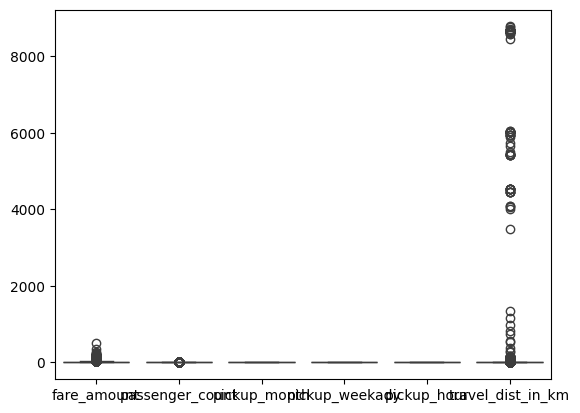

In [224]:
sns.boxplot(df)

In [225]:
def removeOutliers(val,ll,ul):
    if val>ul:
        return ul
    if val<ll:
        return ll
    return val

In [226]:
for col in list(df.columns):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    IQR = q3 -q1
    ul = q3 + 1.5*IQR
    ll = q1 - 1.5*IQR

    df[col] = df[col].apply(lambda val : removeOutliers(val,ll,ul))
    print(f"Outliers from {col} removed")

Outliers from fare_amount removed
Outliers from passenger_count removed
Outliers from pickup_month removed
Outliers from pickup_weekady removed
Outliers from pickup_hour removed
Outliers from travel_dist_in_km removed


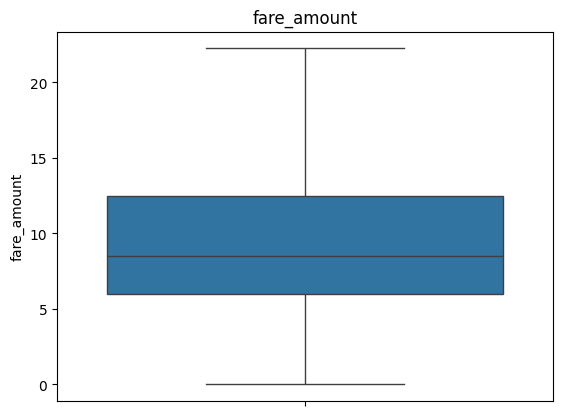

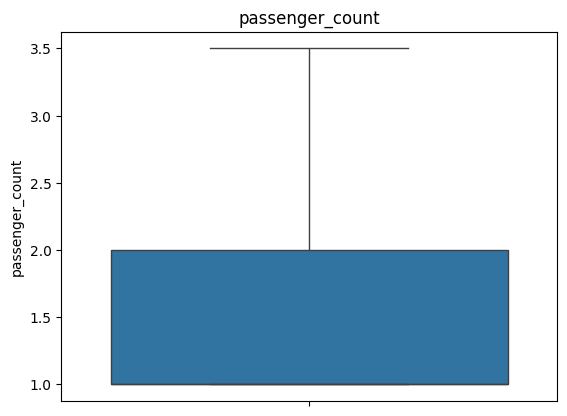

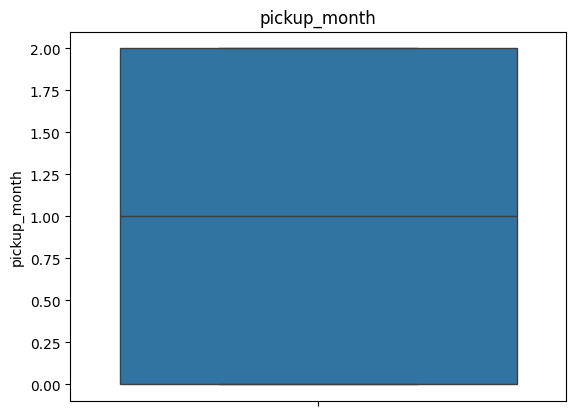

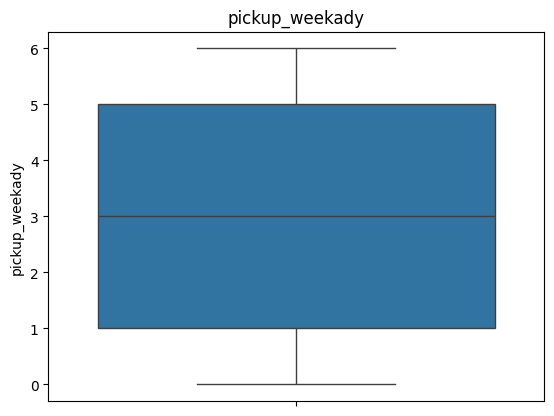

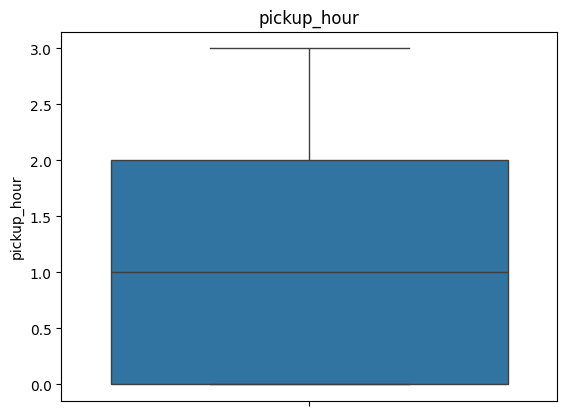

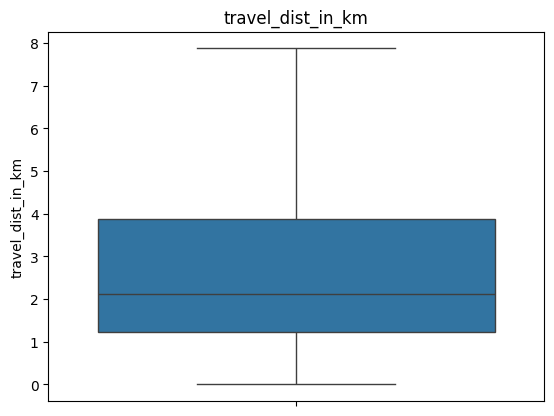

In [227]:
for col in list(df.columns):
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

## 3. Check corellation

In [229]:
df.corr()

,fare_amount,passenger_count,pickup_month,pickup_weekady,pickup_hour,travel_dist_in_km
fare_amount,1.000000,0.014180,0.005352,0.013154,0.031707,0.846114
passenger_count,0.014180,1.000000,0.006366,0.047902,0.058502,0.007443
pickup_month,0.005352,0.006366,1.000000,0.001156,0.001724,-0.004021
pickup_weekady,0.013154,0.047902,0.001156,1.000000,0.144931,0.026643
pickup_hour,0.031707,0.058502,0.001724,0.144931,1.000000,0.076049
travel_dist_in_km,0.846114,0.007443,-0.004021,0.026643,0.076049,1.000000


<Axes: >

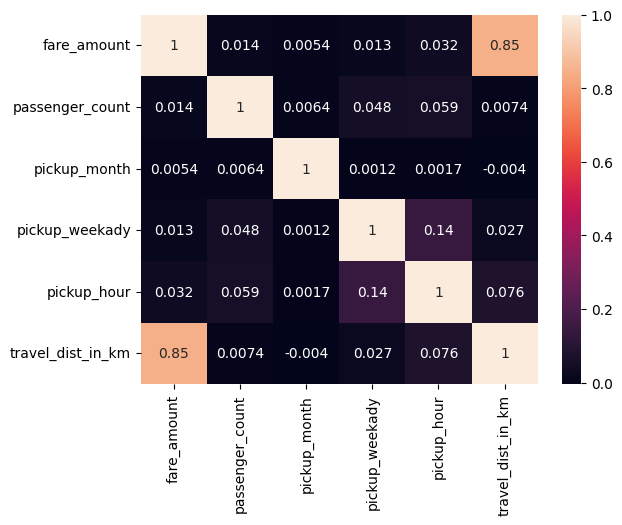

In [233]:
sns.heatmap(df.corr(), annot=True)

In [235]:
"""
    Strong Positive Correlation: fare_amount and travel_dist_in_km (0.846), meaning fare increases with distance.
    Weak Correlations: Other variables (like pickup_month, pickup_weekday, pickup_hour) have low correlations with fare_amount 
                       and travel_dist_in_km, suggesting they don’t impact fare or distance much.
    Slight Correlation: pickup_weekday and pickup_hour (0.145), indicating a small relationship between the day and time of pickups.
"""

"""
    1: Perfect positive correlation (as one variable increases, the other increases).
    -1: Perfect negative correlation (as one variable increases, the other decreases).
    0: No correlation (variables are independent of each other).
"""
pass

## 4. Linear Regreesion

In [241]:
from sklearn.metrics import classification_report

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [238]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('fare_amount',axis=1), df['fare_amount'], test_size=0.33, random_state=42)

In [240]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [245]:
lr_predict = lrmodel.predict(X_test)

## 5. Random Forest

In [246]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [250]:
rf_predict = rf_model.predict(X_test)

## 6. R2, RMSE score

In [251]:
from sklearn.metrics import r2_score, mean_squared_error

In [255]:
print("R2 score for Linear regression        = ",r2_score(lr_predict,y_test))
print("R2 score for Random Forest regression = ",r2_score(rf_predict,y_test))

R2 score for Linear regression        =  0.6031647334562564
R2 score for Random Forest regression =  0.6331022639510394


In [256]:
print("RMSE score for Linear regression        = ",np.sqrt(mean_squared_error(lr_predict,y_test)))
print("RMSE score for Random Forest regression = ",np.sqrt(mean_squared_error(rf_predict,y_test)))

RMSE score for Linear regression        =  2.9152363750417747
RMSE score for Random Forest regression =  2.9695705078081054
